<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [167]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.simplefilter('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [169]:
data = pd.read_csv('./train.csv')

### Краем глаза посмотрим на основные сводные таблицы по нашим данным

In [170]:
data.sample(n=10)  # слуайные объекты из тренировочной выборки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
834,10,19.80,196.75,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),0
1922,1,50.15,50.15,Male,1,No,Yes,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,1
2231,1,69.50,69.5,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
1374,1,43.30,43.3,Male,1,No,No,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,1
3705,63,99.90,6137,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),1
47,6,19.70,111.65,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
815,47,59.60,2754,Male,1,No,No,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),0
2688,2,71.30,157.75,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
4321,18,39.05,669.85,Female,0,Yes,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,1
3548,53,100.30,5200.8,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,0


In [171]:
data.describe()  # основные статистики по числовым признакам

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [172]:
data.describe(include=('object'))  # оснонвые статистики по категориальным признакам

,TotalSpent,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,4978,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,9,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [173]:
data.isna().sum() / data.shape[0] * 100  # смотрим на пропуски в процентах

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

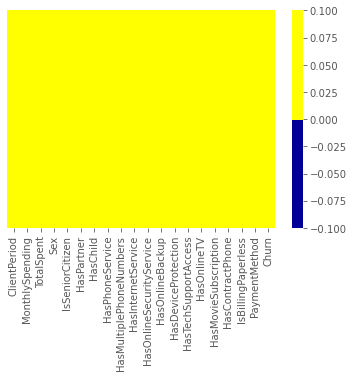

In [174]:
# отрисуем график пропусков (синий - пропуск)
colours = ['#000099', '#ffff00'] 
sns.heatmap(
    data.isnull(),
    cmap=sns.color_palette(colours),
    yticklabels=False,
);

Видно, что в данных пропусков не наблюдается. В дальнейшем, проанализируем их еще на предмет выбросов какими-нибудь критериями.

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Как можно заметить, достаточно большое число данных у нас относится к категорильным, что, конечно, затруднит работу алгоритмов. Но ничего, это частично поправимо!

In [215]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent',
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

bin_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
]

In [177]:
# YOUR CODE

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Сперва узнаем, какое вообще "распределение" целевой переменной

	0.74 - rate of 0
    	0.26 - rate of 1


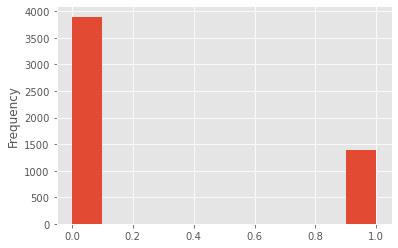

In [178]:
types, frequency = np.unique(data['Churn'], return_counts=True)
print(f"\t{round(frequency[0] / data['Churn'].shape[0], 2)} - rate of {types[0]}\n\
    \t{round(frequency[1] / data['Churn'].shape[0], 2)} - rate of {types[1]}")

data['Churn'].plot(kind='hist');

Видно, что выборка несбалансированная, так как объекты с целевой переменной `1` составляют лишь примерно четверть всех данных, но ресэмплить я все-таки не буду, попробую использовать другие методы просто более аккуратно

### Посмотрим теперь на распределение числовых признаков

Стоит обратить внимание, что почему-то `TotalSpent` имеет тип `object`, хотя и является числовым признаком. Исправим же это недоразумение!

In [179]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

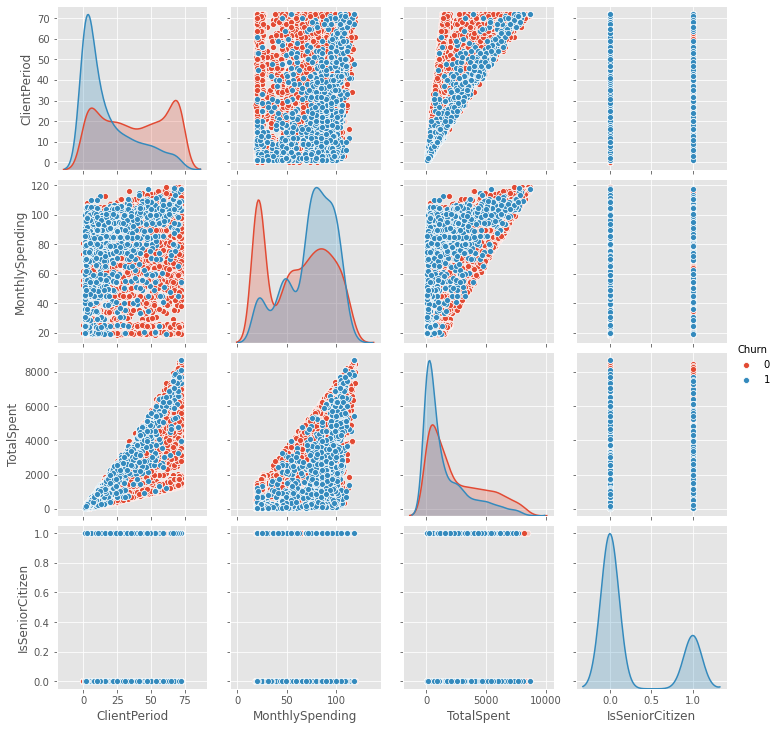

In [213]:
sns.pairplot(data, hue='Churn');

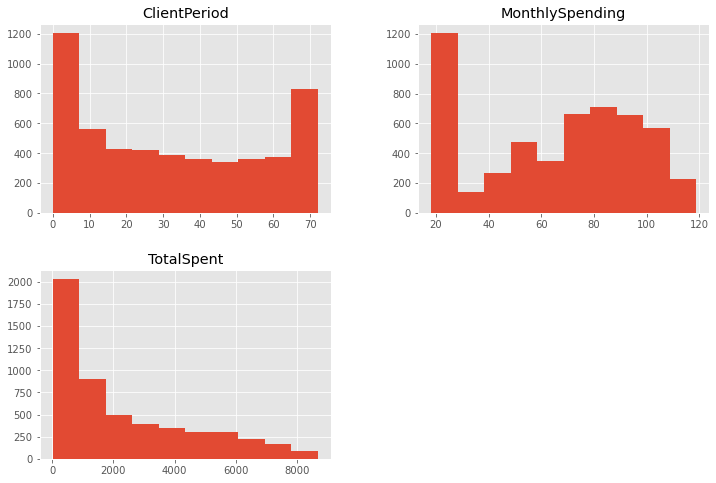

In [180]:
data[num_cols].hist(figsize=(12, 8));

То же самое, но в логарифмической шкале:

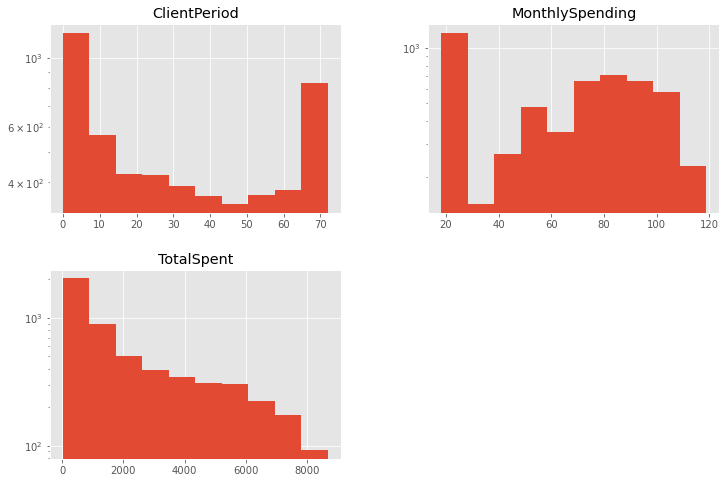

In [181]:
data[num_cols].hist(figsize=(12, 8), log=True);

Видно, что в целом нельзя говорить о тяжелых хвостах в распределениях числовых признаков, но, тем не менее не побрезгуем затем проналазировать данные на предмет нахождения их в *окрестности трех $\sigma$* среднего

In [182]:
def detect_outlier_std(data, feature, threshold=3):
    mean = data[feature].mean()
    sigma = data[feature].std()
    
    upper_bound = mean + threshold * sigma
    lower_bound = mean - threshold * sigma
    
    outliers = pd.concat([data[data[feature] > upper_bound], data[data[feature] < lower_bound]], axis=0)
    
    return outliers

In [183]:
print("Согласно правилу трех сигм:\n")
for feature in num_cols:
    print(f"количество выбросов для признака {feature}: {detect_outlier_std(data, feature).shape[0]}")

Согласно правилу трех сигм:

количество выбросов для признака ClientPeriod: 0
количество выбросов для признака MonthlySpending: 0
количество выбросов для признака TotalSpent: 0


Как можно заметить, все числовые признаки лежат в окрестности трех сигм (трех стандартных отклонений). Аналогично, проделаем процедуру с интерквантильным размахом:

In [184]:
def detect_outlier_iqr(data, feature, threshold=1.5):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    
    upper_bound = data[feature].quantile(0.75) + (IQR * threshold)
    lower_bound = data[feature].quantile(0.25) - (IQR * threshold)
    
    outliers = pd.concat([data[data[feature] > upper_bound], data[data[feature] < lower_bound]], axis=0)
    
    return outliers

In [185]:
print(f"Согласно правилу 1.5 интерквантильных размахов (1.5*IQR):\n")
for feature in num_cols:
    print(f"количество выбросов для признака {feature}: {detect_outlier_iqr(data, feature).shape[0]}")

Согласно правилу 1.5 интерквантильных размахов (1.5*IQR):

количество выбросов для признака ClientPeriod: 0
количество выбросов для признака MonthlySpending: 0
количество выбросов для признака TotalSpent: 0


C чистой совестью заявляем, что явных выбросов в данных **НЕТ**

Посмотрим еще на ящики с усами для числовых признаков относительно разных категориальных переменных

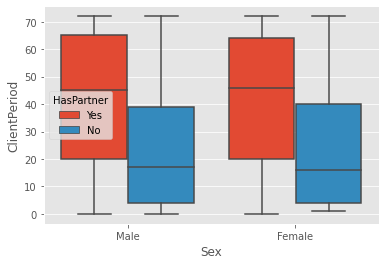

In [191]:
sns.boxplot(x='Sex', y='ClientPeriod', data=data, hue='HasPartner', saturation=1);

Например, здесь видно, что если у человека есть партнер (вне зависимости от пола), то `ClientPeriod` больше, чем у людей без партнера

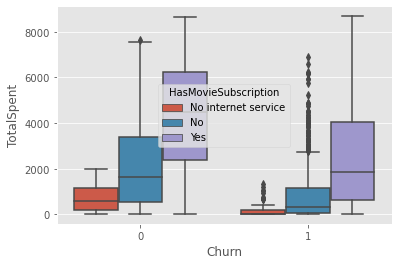

In [196]:
sns.boxplot(x='Churn', y='TotalSpent', hue='HasMovieSubscription',data=data);

Также изобразим, как признаки связаны с оттоком

In [200]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

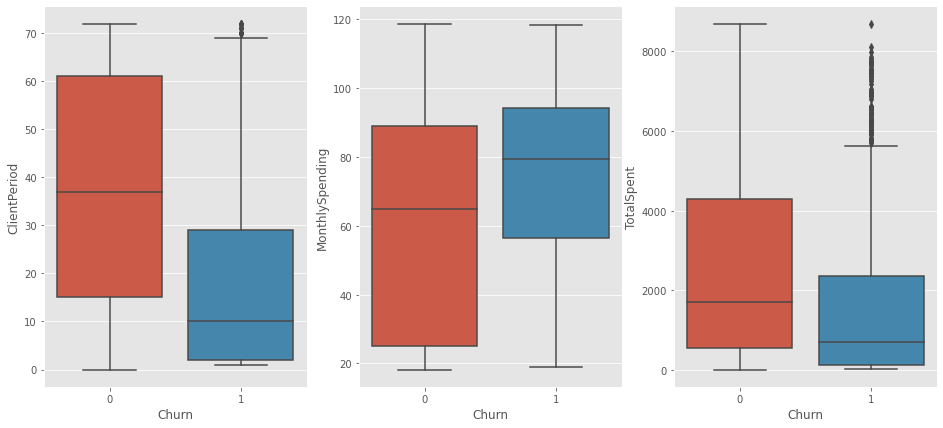

In [212]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 7))

for idx, feat in  enumerate(num_cols):
    sns.boxplot(x='Churn', y=feat, data=data, ax=axes[idx])
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(feat);

видно, что люди, потратившие больше, реже уходят, но также достаточно много выбросов, в смысле того, что клиент потратил много, но все равно ушел

Теперь поизучаем матрицу корреляций:

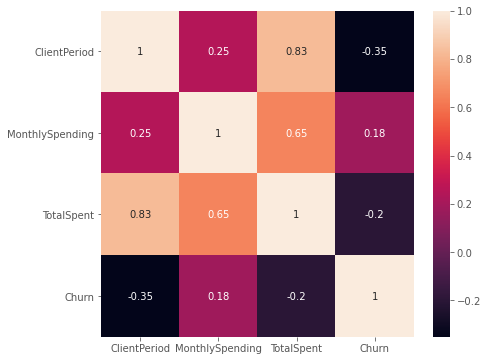

In [142]:
fig, ax = plt.subplots(figsize=(7,6))

sns.heatmap(
    data[num_cols + [target_col]].corr(),
    annot=True,
);

Как видно из матрицы, `TotalSpent` и `ClientPeriod` довольно прилично коррелируют между собой. Тем не менее, убирать я не буду один из этих столбцов, так как коррелируют они не очень сильно. Заметим также, что `TotalSpent` и `MonthlySpending` имеют некоторую линейную зависимость, вероятно, это из-за того, что оба эти признака суть признаки про траты

### Перейдем к категориальным

изобразим для бинарных (или почти) признаков `countplot` относительно целевой переменной

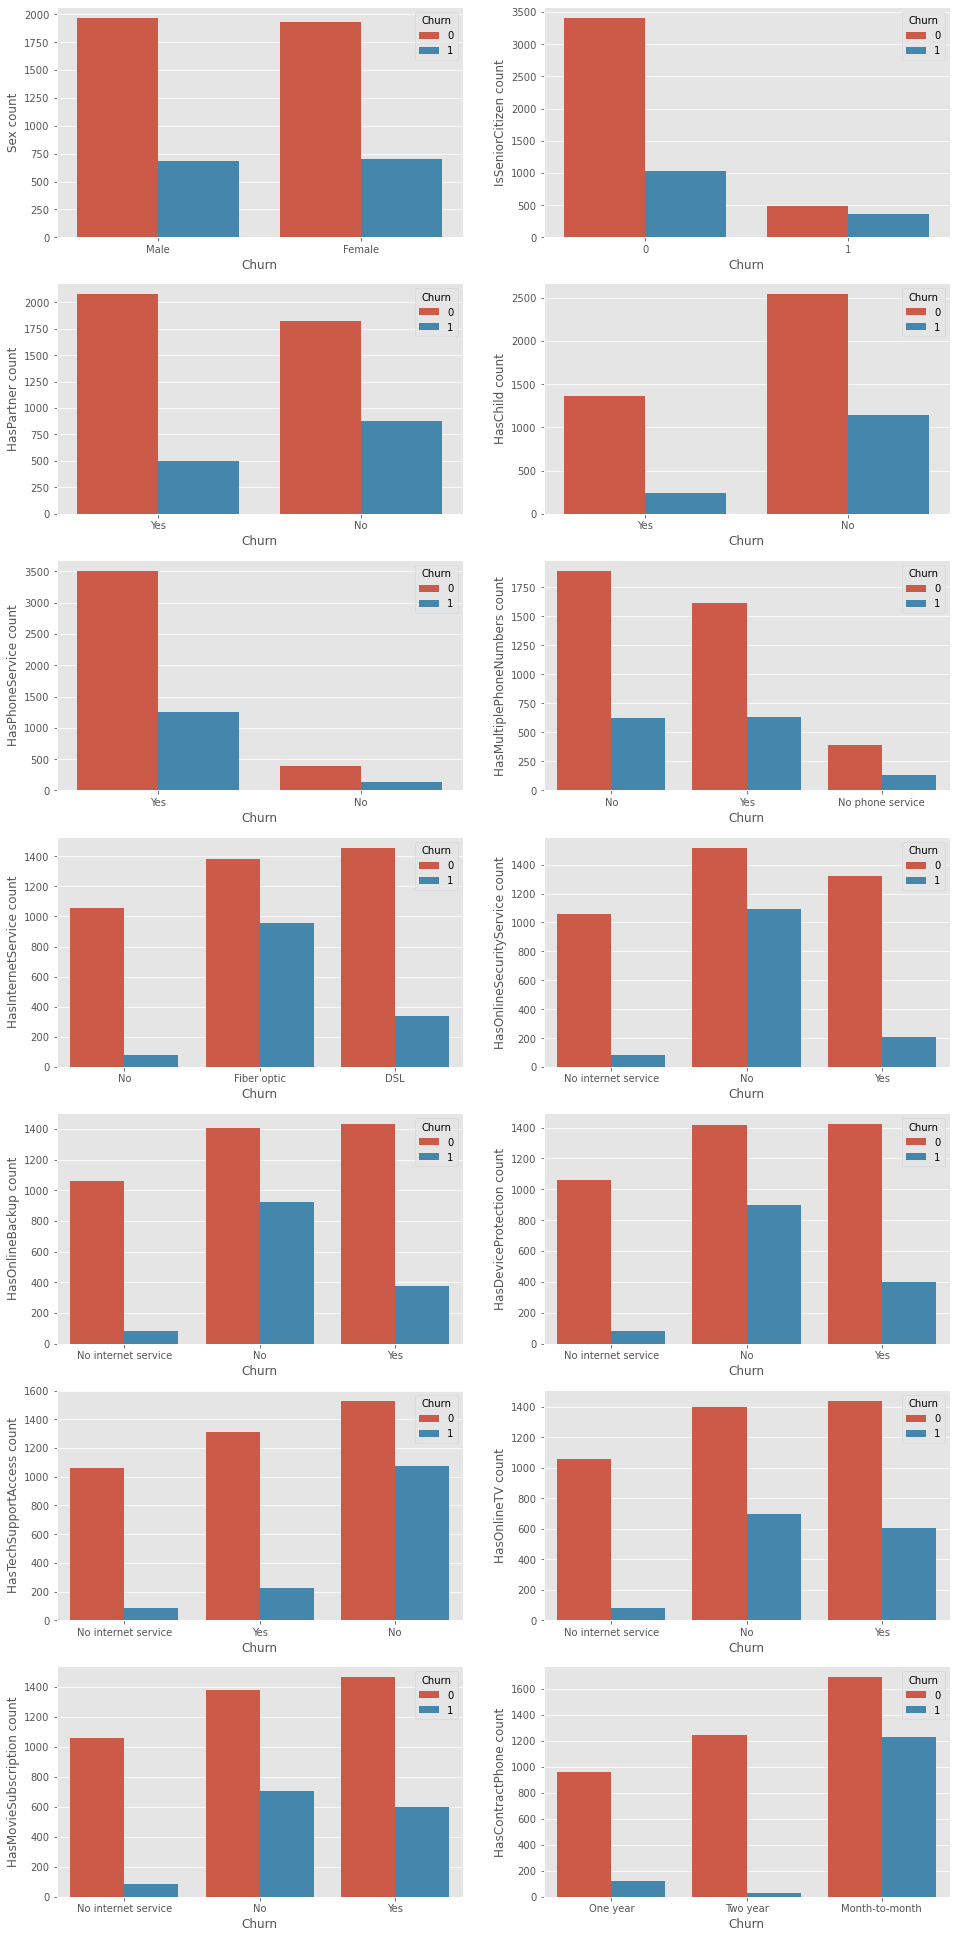

In [234]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 14))
plt.subplots_adjust(top=2)

for ax, binary_feature in zip(axes.flat, bin_cols):
    sns.countplot(x=binary_feature, hue='Churn', data=data, ax=ax)
    ax.set_xlabel('Churn')
    ax.set_ylabel(f'{binary_feature} count');

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.